# Analysis of ETC Data 

In [2]:
from Prediction import Prediction
from DataPreparation import DataPreparation
import pandas as pd
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
import os
from matplotlib.patches import Rectangle
import numpy as np
import tensorflow as tf
from sklearn.metrics import (confusion_matrix, 
                             precision_recall_curve)
import tensorflow as tf 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
wdir = '/Users/francaspeth/Google Drive/Masterarbeit/Share/final/'

In [3]:
timestep = 10

## Step 1: Load Model 

In [4]:
#with open('/Users/francaspeth/Google Drive/Masterarbeit/Share/AutoencoderModelle/LSTM/TrainingonETC/slidingWindow/ETCslidallVarmodel_config.json') as json_file:
with open('/Users/francaspeth/Downloads/franca0606/ETCslid4Var2layersmodel_config.json') as json_file:
    json_config = json_file.read()
model = tf.keras.models.model_from_json(json_config)
model.load_weights('/Users/francaspeth/Downloads/franca0606/ETCslidallVarweights_only.h5')
#model.load_weights('/Users/francaspeth/Google Drive/Masterarbeit/Share/AutoencoderModelle/LSTM/TrainingonETC/slidingWindow/ETCslidallVarweights_only.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## Step 2: Load the test data and prepare it: 

In [5]:
cols = ['num_tx', 'avg_tx_value', 'avg_nonce', 'size', 'difficulty',
       'total_difficulty', 'gas_limit', 'gas_used', 'block_time', 'hashrate',
       'num_uncles', 'total_num_uncles', 'num_emptyblocks','dummy_miner_before','dummy_miner_count']
test20 = pd.read_csv(wdir+'ETC_block_2020_alldata.csv',
                   low_memory=False)
PrepTest20 = DataPreparation(test20, timestep=timestep)
PrepTest20.df.sort_values('number')
PrepTest20.change_idx()

label_list = PrepTest20.df['label'].tolist()
PrepTest20.change_data_types(cols)

testp20 = PrepTest20.transform_data()

## Step 3: Make the prediction and plot data points by Threshhold: 

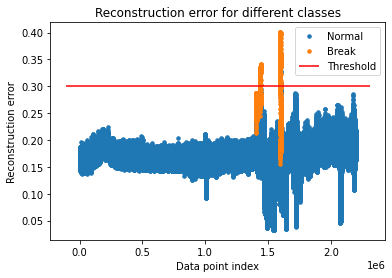

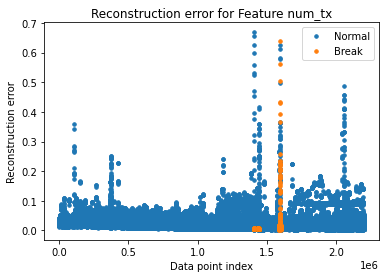

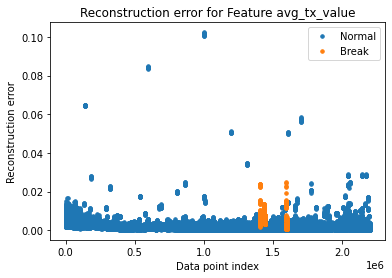

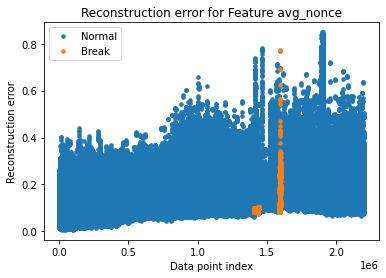

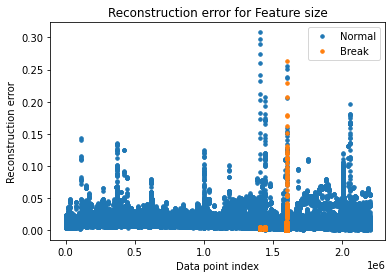

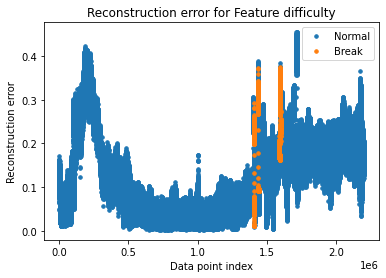

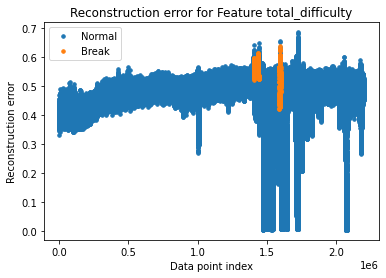

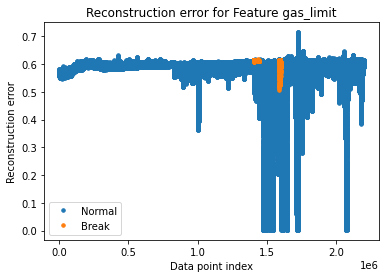

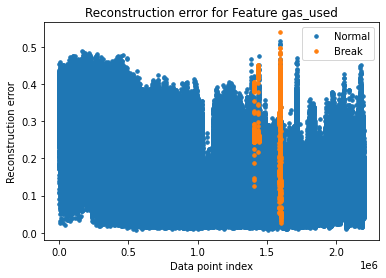

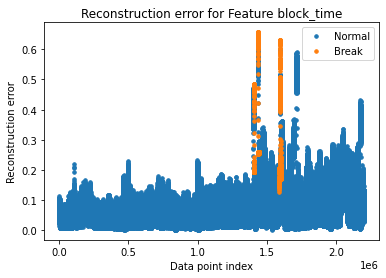

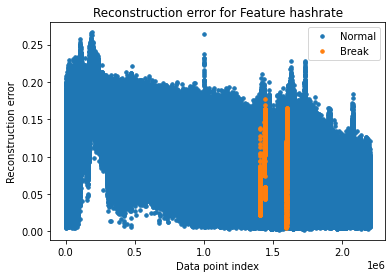

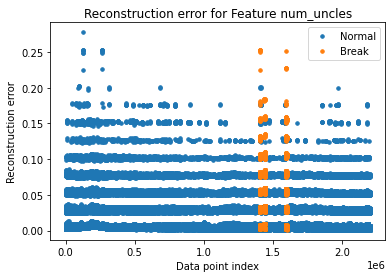

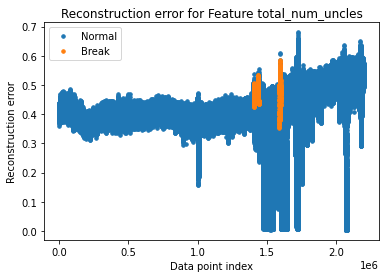

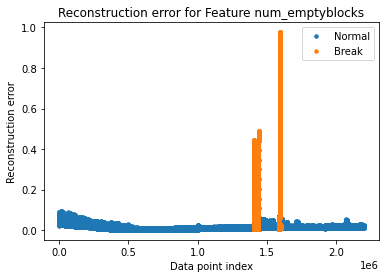

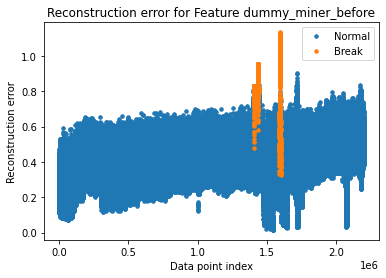

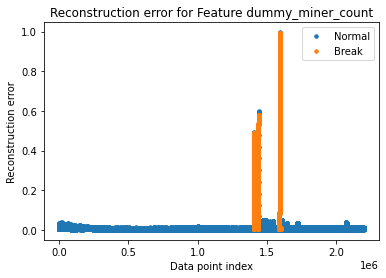

In [6]:
Pred1 = Prediction(
    model = model,
    test = testp20
)
Pred1.make_prediction()
Pred1.plot_avg_reconstruction_error(label_list[timestep:])
Pred1.plot_error_all_features(cols, label_list[timestep:])

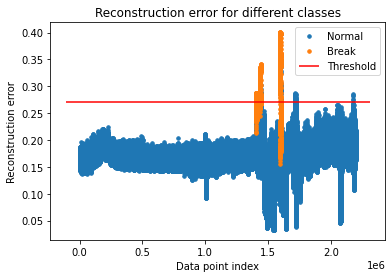

In [60]:
Pred1.plot_avg_reconstruction_error(label_list[timestep:], 0.27)

## Step 4: Adjust Treshhold py PR-Diagram 

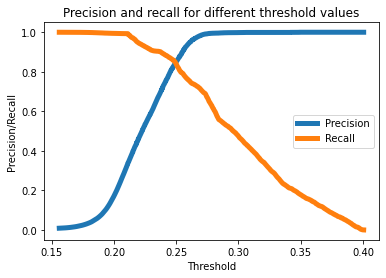

In [7]:
Pred1.plot_pr_diagram(label_list,timestep)

## Step 5: Performance on test data: 

In [8]:
Pred1.performance(0.27,label_list, timestep)

The number of malicous blocks is: 15320 The number of normal blocks: 2185798
The classifications using the MAD method with threshold=0.27 are as follows:
        [[2185623     165]
 [   4466   10854]]

        % of transactions labeled as fraud that were correct (precision): 10854/(165+10854) = 98.50%
        % of fraudulent transactions were caught succesfully (recall):    10854/(4466+10854) = 70.85%
        Accuracy: 99.79% 
        F1 Score: 0.8241770758191276


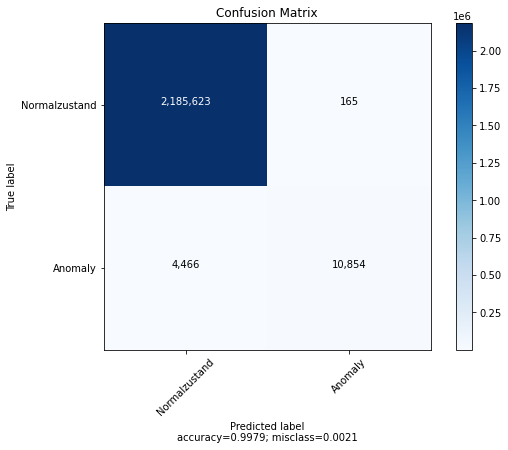

In [9]:
Pred1.plot_confusion_matrix(normalize    = False,
                      target_names = ['Normalzustand','Anomaly'],
                      title        = "Confusion Matrix")

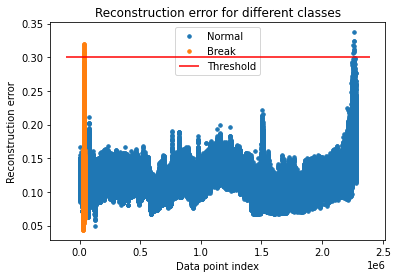

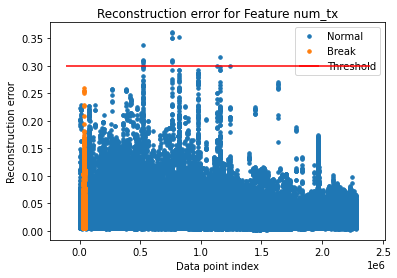

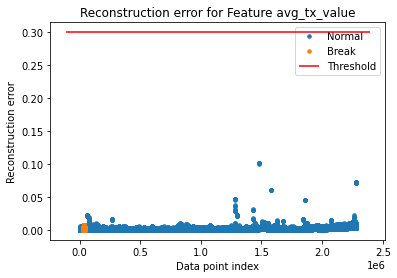

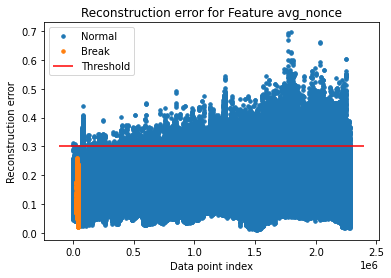

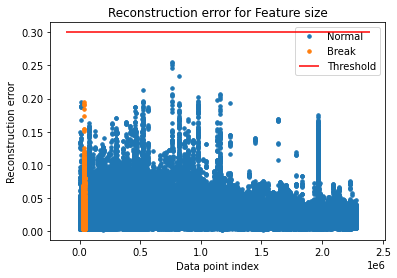

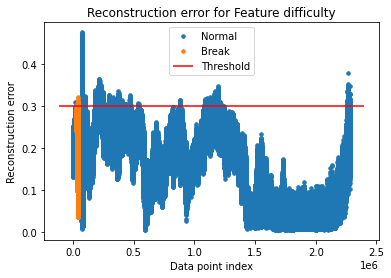

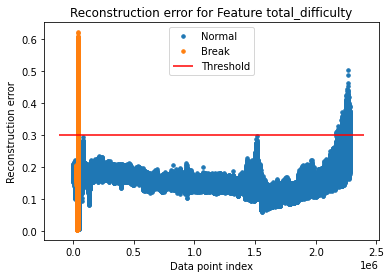

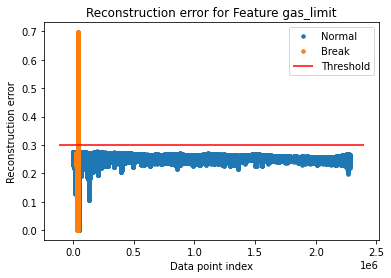

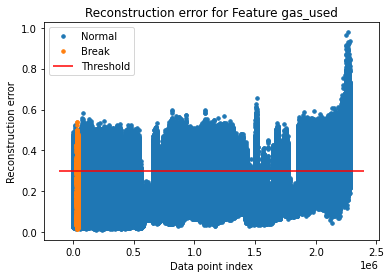

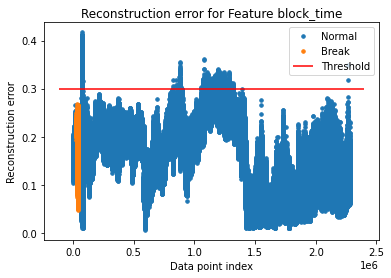

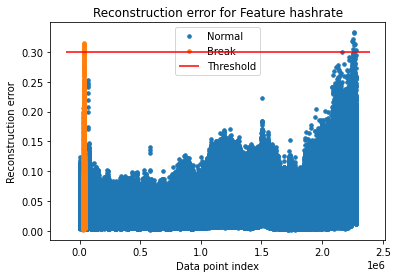

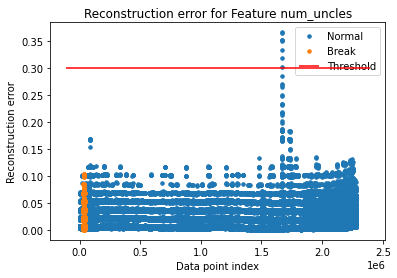

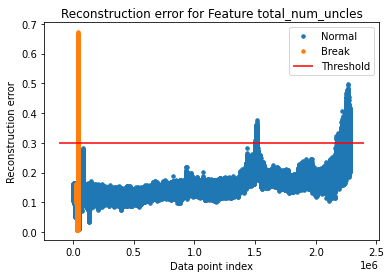

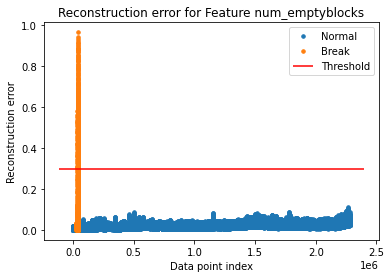

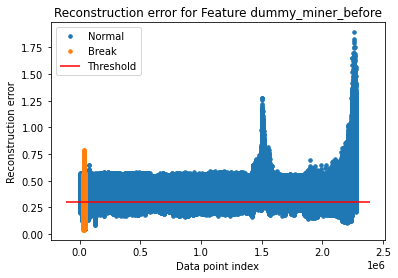

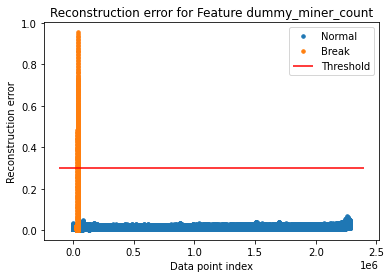

In [35]:
timestep=10
test19 = pd.read_csv(wdir+'ETC_block_2019_alldata.csv',
                   low_memory=False)
PrepTest19 = DataPreparation(test19, timestep=timestep)
PrepTest19.df.sort_values('number')
PrepTest19.change_idx()
#PrepTest.drop_first_n_cols()
#PrepTest.add_num_empty_blocks()

label_list = PrepTest19.df['label'].tolist()
PrepTest19.change_data_types(cols)

testp19 = PrepTest19.transform_data()

In [ ]:
Pred19 = Prediction(
    model = model,
    test = testp19
)
Pred19.make_prediction()
Pred1.plot_avg_reconstruction_error(label_list[timestep:])
Pred1.plot_error_all_features(cols, label_list[timestep:])

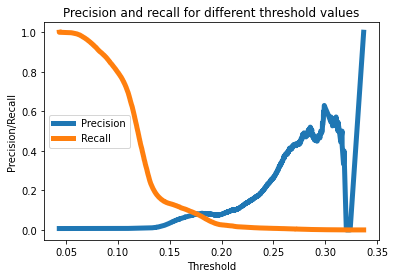

In [37]:
Pred19.plot_pr_diagram(label_list,timestep)

In [38]:
Pred19.performance(0.27,label_list, timestep)

The number of malicous blocks is: 16068 The number of normal blocks: 2264890
The classifications using the MAD method with threshold=0.04 are as follows:
[[2264529     351]
 [  15941     127]]

% of transactions labeled as fraud that were correct (precision): 127/(351+127) = 26.57%
% of fraudulent transactions were caught succesfully (recall):    127/(15941+127) = 0.79%
Accuracy: 99.29% 
F1 Score: 0.015351142270035052


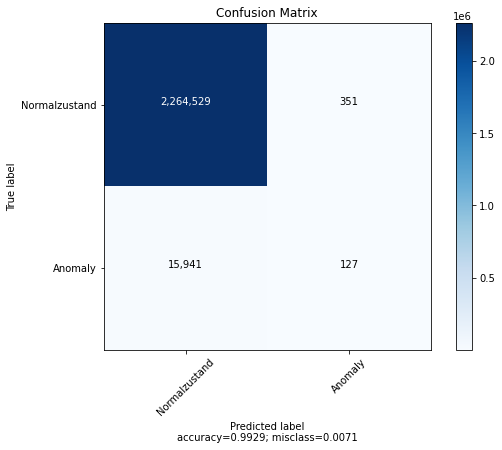

In [80]:
Pred19.plot_confusion_matrix(normalize    = False,
                      target_names = ['Normalzustand','Anomaly'],
                      title        = "Confusion Matrix")